In [1]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
tqdm.pandas()

# Summary

Face recognition models are regular convolutional neural networks models. They represent face photos as vectors. We find the distance between these two vectors to compare two faces. Finally, we classify two faces as same person whose distance is less than a threshold value.

The question is that how to determine the threshold. In this notebook, we will find the best split point for a threshold.

# Data set

In [2]:
# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg"],
    "Jack": ["img16.jpg", "img17.jpg"],
    "Elon": ["img18.jpg", "img19.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"]
}

# Positive samples
Find different photos of same people

In [3]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [4]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

# Negative samples
Compare photos of different people

In [5]:
samples_list = list(idendities.values())

In [6]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)
        

In [7]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

# Merge Positives and Negative Samples

In [8]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [9]:
df.shape

(300, 3)

In [10]:
df.decision.value_counts()

No     262
Yes     38
Name: decision, dtype: int64

In [11]:
df.file_x = "D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/"+df.file_x
df.file_y = "D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/"+df.file_y

# DeepFace

In [12]:
import sys
import os
 

parent = os.path.dirname('tests')
sys.path.append(parent)
sys.path.insert(0, 'D:\FYP_code\FYP_Model_code_API')

from  deepface import DeepFace

In [13]:
instances = df[["file_x", "file_y"]].values.tolist()

In [14]:
model_name = "ArcFace"
distance_metric = "cosine"

In [15]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification:   0%|          | 0/300 [00:00<?, ?it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:1.2294573783874512
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23921569 0.5921569  0.79607844]
   [0.20392157 0.57

Verification:   0%|          | 1/300 [00:03<16:40,  3.34s/it]

Detect face Preprocess the Img:0.4404888153076172
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843138]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.50980395 0.50980395 0.50980395]
   [0.56078434 0.56078434 0.56078434]
   ...
   [0.03529412 0.03137255 0.07058824]
   [0.00784314 0.01176471 0.05098039]
   [0.         0.01176471 0.05098039]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.5568628  0.5568628  0.5568628 ]
   [0.53333336 0.53333336 0.53333336]
   ...
   [0.03921569 0.04313726 0.08235294]
   [0.00784314 0.01960784 0.0627451 ]
   [0.02745098 0.04705882 0.09019608]]

  ...

  [[0.0627451  0.12156863 0.19215687]
   [0.1254902  0.15686275 0.23529412]
   [0.09411765 0.12941177 0.20784314]
   ...
   [0.22745098 0.21960784 0.21960784]
   [0.21568628 0.20784314 0.20784314]
   [0.30980393 0.2901961  0.2784314

Verification:   1%|          | 2/300 [00:04<11:31,  2.32s/it]

Detect face Preprocess the Img:0.5749833583831787
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.43529412 0.3882353  0.34901962]
   [0.4392157  0.38431373 0.3372549 ]
   [0.         0.         0.       

Verification:   1%|          | 3/300 [00:06<08:37,  1.74s/it]

Detect face Preprocess the Img:0.08495116233825684
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.09411765 0.09803922]
   [0.05490196 0.05490196 0.058823

Verification:   1%|▏         | 4/300 [00:07<07:46,  1.58s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.531691312789917
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23921569 0.5921569  0.79607844]
   [0.20392157 0.572

Verification:   2%|▏         | 5/300 [00:08<07:39,  1.56s/it]

Detect face Preprocess the Img:0.5126879215240479
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.16078432 0.28627452 0.43529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.15686275 0.28627452 0.4392157 ]
   ...
   [0.12156863 0.2        0.31764707]
   [0.10196079 0.1764706  0.28235295]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:   2%|▏         | 6/300 [00:09<06:41,  1.36s/it]

Detect face Preprocess the Img:0.08994841575622559
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7058824  0.63529414]
   [0.7490196  0.7019608  0.635294

Verification:   2%|▏         | 7/300 [00:10<06:20,  1.30s/it]

Detect face Preprocess the Img:0.15191125869750977
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1618351936340332
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.4244115352630615
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.078431

Verification:   3%|▎         | 8/300 [00:12<06:24,  1.32s/it]

Detect face Preprocess the Img:0.5094468593597412
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.43529412 0.3882353  0.34901962]
   [0.4392157  0.38431373 0.3372549 ]
   [0.         0.         0.       

Verification:   3%|▎         | 9/300 [00:13<05:37,  1.16s/it]

Detect face Preprocess the Img:0.07698726654052734
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.09411765 0.09803922]
   [0.05490196 0.05490196 0.058823

Verification:   3%|▎         | 10/300 [00:14<05:18,  1.10s/it]

Detect face Preprocess the Img:0.19365930557250977
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215687]]

  [[0.32156864 0.3372549  0.3137255 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07450981 0.08235294 0.08627451]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.07450981 0.08235294 0.08627451]
   [0.15686275 0.16470589 0.16862746]]

  [[0.24313726 0.24705882 0.24705882]
   [0.14509805 0.15686275 0.15686275]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.04313726 0.05098039 0.05098039]
   [0.06666667 0.07450981 0.07450981]
   [0.1254902  0.13333334 0.13333334]]

  ...

  [[0.33333334 0.31764707 0.24705882]
   [0.43529412 0.39215687 0.34117648]
   [0.76862746 0.72156864 0.6745098 ]
   ...
   [0.13333334 0.12941177 0.1254902 ]
   [0.1764706  0.16470589 0.14901961]
   [0.18039216 0.16862746 0.152941

Verification:   4%|▎         | 11/300 [00:15<05:38,  1.17s/it]

Detect face Preprocess the Img:0.5238618850708008
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.16078432 0.28627452 0.43529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.15686275 0.28627452 0.4392157 ]
   ...
   [0.12156863 0.2        0.31764707]
   [0.10196079 0.1764706  0.28235295]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:   4%|▍         | 12/300 [00:16<05:13,  1.09s/it]

Detect face Preprocess the Img:0.09494590759277344
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7058824  0.63529414]
   [0.7490196  0.7019608  0.635294

Verification:   4%|▍         | 13/300 [00:17<05:00,  1.05s/it]

Detect face Preprocess the Img:0.12191963195800781
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15890836715698242
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5199136734008789
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:   5%|▍         | 14/300 [00:18<04:54,  1.03s/it]

Detect face Preprocess the Img:0.07695746421813965
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.09411765 0.09803922]
   [0.05490196 0.05490196 0.058823

Verification:   5%|▌         | 15/300 [00:19<05:03,  1.06s/it]

Detect face Preprocess the Img:0.18489432334899902
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215687]]

  [[0.32156864 0.3372549  0.3137255 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07450981 0.08235294 0.08627451]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.07450981 0.08235294 0.08627451]
   [0.15686275 0.16470589 0.16862746]]

  [[0.24313726 0.24705882 0.24705882]
   [0.14509805 0.15686275 0.15686275]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.04313726 0.05098039 0.05098039]
   [0.06666667 0.07450981 0.07450981]
   [0.1254902  0.13333334 0.13333334]]

  ...

  [[0.33333334 0.31764707 0.24705882]
   [0.43529412 0.39215687 0.34117648]
   [0.76862746 0.72156864 0.6745098 ]
   ...
   [0.13333334 0.12941177 0.1254902 ]
   [0.1764706  0.16470589 0.14901961]
   [0.18039216 0.16862746 0.152941

Verification:   5%|▌         | 16/300 [00:20<05:38,  1.19s/it]

Detect face Preprocess the Img:0.5111770629882812
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.16078432 0.28627452 0.43529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.15686275 0.28627452 0.4392157 ]
   ...
   [0.12156863 0.2        0.31764707]
   [0.10196079 0.1764706  0.28235295]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:   6%|▌         | 17/300 [00:21<05:25,  1.15s/it]

Detect face Preprocess the Img:0.09194707870483398
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7058824  0.63529414]
   [0.7490196  0.7019608  0.635294

Verification:   6%|▌         | 18/300 [00:23<05:23,  1.15s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08295226097106934
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.0

Verification:   6%|▋         | 19/300 [00:23<04:39,  1.00it/s]

Detect face Preprocess the Img:0.20088505744934082
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215687]]

  [[0.32156864 0.3372549  0.3137255 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07450981 0.08235294 0.08627451]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.07450981 0.08235294 0.08627451]
   [0.15686275 0.16470589 0.16862746]]

  [[0.24313726 0.24705882 0.24705882]
   [0.14509805 0.15686275 0.15686275]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.04313726 0.05098039 0.05098039]
   [0.06666667 0.07450981 0.07450981]
   [0.1254902  0.13333334 0.13333334]]

  ...

  [[0.33333334 0.31764707 0.24705882]
   [0.43529412 0.39215687 0.34117648]
   [0.76862746 0.72156864 0.6745098 ]
   ...
   [0.13333334 0.12941177 0.1254902 ]
   [0.1764706  0.16470589 0.14901961]
   [0.18039216 0.16862746 0.152941

Verification:   7%|▋         | 20/300 [00:24<04:35,  1.02it/s]

Detect face Preprocess the Img:0.5050699710845947
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.16078432 0.28627452 0.43529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.15686275 0.28627452 0.4392157 ]
   ...
   [0.12156863 0.2        0.31764707]
   [0.10196079 0.1764706  0.28235295]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:   7%|▋         | 21/300 [00:25<03:58,  1.17it/s]

Detect face Preprocess the Img:0.09594464302062988
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7058824  0.63529414]
   [0.7490196  0.7019608  0.635294

Verification:   7%|▋         | 22/300 [00:25<03:34,  1.30it/s]

Detect face Preprocess the Img:0.14191794395446777
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15391182899475098
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.2033083438873291
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215

Verification:   8%|▊         | 23/300 [00:26<03:57,  1.17it/s]

Detect face Preprocess the Img:0.48989439010620117
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.16078432 0.28627452 0.43529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.15686275 0.28627452 0.4392157 ]
   ...
   [0.12156863 0.2        0.31764707]
   [0.10196079 0.1764706  0.28235295]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:   8%|▊         | 24/300 [00:27<03:37,  1.27it/s]

Detect face Preprocess the Img:0.09647822380065918
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7058824  0.63529414]
   [0.7490196  0.7019608  0.635294

Verification:   8%|▊         | 25/300 [00:28<03:25,  1.34it/s]

Detect face Preprocess the Img:0.12392997741699219
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15407109260559082
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.514319658279419
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:   9%|▊         | 26/300 [00:29<03:42,  1.23it/s]

Detect face Preprocess the Img:0.09494566917419434
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7058824  0.63529414]
   [0.7490196  0.7019608  0.635294

Verification:   9%|▉         | 27/300 [00:30<03:58,  1.14it/s]

Detect face Preprocess the Img:0.12104964256286621
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15612435340881348
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.09896111488342285
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.   

Verification:   9%|▉         | 28/300 [00:30<03:34,  1.27it/s]

Detect face Preprocess the Img:0.12494468688964844
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16793608665466309
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.2059793472290039
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  10%|▉         | 29/300 [00:31<03:45,  1.20it/s]

Detect face Preprocess the Img:0.3801002502441406
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  10%|█         | 30/300 [00:33<04:53,  1.09s/it]

Time taken in Model Predicts:0.22986745834350586
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.5098178386688232
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9

Verification:  10%|█         | 31/300 [00:34<04:55,  1.10s/it]

Time taken in Model Predicts:0.2388627529144287
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.47391343116760254
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9

Verification:  11%|█         | 32/300 [00:35<04:57,  1.11s/it]

Detect face Preprocess the Img:0.24186491966247559
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.      

Verification:  11%|█         | 33/300 [00:36<04:28,  1.00s/it]

Detect face Preprocess the Img:0.23001670837402344
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.      

Verification:  11%|█▏        | 34/300 [00:36<03:51,  1.15it/s]

Detect face Preprocess the Img:0.09894204139709473
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  12%|█▏        | 35/300 [00:37<03:57,  1.12it/s]

Detect face Preprocess the Img:0.33197903633117676
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14777803421020508
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img20.jpg
Detect face Preprocess the Img:0.17789649963378906
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]


Verification:  12%|█▏        | 36/300 [00:38<03:34,  1.23it/s]

Detect face Preprocess the Img:0.08894896507263184
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  12%|█▏        | 37/300 [00:40<04:28,  1.02s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img24.jpg
Detect face Preprocess the Img:0.29509496688842773
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.

Verification:  13%|█▎        | 38/300 [00:40<04:07,  1.06it/s]

Time taken in Model Predicts:0.15491104125976562
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.5139095783233643
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23

Verification:  13%|█▎        | 39/300 [00:41<04:22,  1.01s/it]

Detect face Preprocess the Img:0.2061774730682373
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  13%|█▎        | 40/300 [00:43<04:44,  1.10s/it]

Detect face Preprocess the Img:0.36447787284851074
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  14%|█▎        | 41/300 [00:44<04:36,  1.07s/it]

Detect face Preprocess the Img:0.22852373123168945
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  14%|█▍        | 42/300 [00:45<04:42,  1.09s/it]

Detect face Preprocess the Img:0.3734276294708252
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  14%|█▍        | 43/300 [00:46<04:50,  1.13s/it]

Detect face Preprocess the Img:0.23616528511047363
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  15%|█▍        | 44/300 [00:47<05:06,  1.20s/it]

Detect face Preprocess the Img:0.37342095375061035
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  15%|█▌        | 45/300 [00:48<04:24,  1.04s/it]

Detect face Preprocess the Img:0.20441341400146484
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  15%|█▌        | 46/300 [00:49<04:08,  1.02it/s]

Detect face Preprocess the Img:0.38344597816467285
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  16%|█▌        | 47/300 [00:50<03:52,  1.09it/s]

Detect face Preprocess the Img:0.20958399772644043
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  16%|█▌        | 48/300 [00:51<03:53,  1.08it/s]

Detect face Preprocess the Img:0.3740956783294678
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  16%|█▋        | 49/300 [00:52<04:06,  1.02it/s]

Detect face Preprocess the Img:0.21714138984680176
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  17%|█▋        | 50/300 [00:53<04:29,  1.08s/it]

Detect face Preprocess the Img:0.38139796257019043
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  17%|█▋        | 51/300 [00:54<03:56,  1.05it/s]

Detect face Preprocess the Img:0.22324419021606445
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  17%|█▋        | 52/300 [00:55<03:43,  1.11it/s]

Detect face Preprocess the Img:0.33859920501708984
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  18%|█▊        | 53/300 [00:55<03:27,  1.19it/s]

Detect face Preprocess the Img:0.21910762786865234
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  18%|█▊        | 54/300 [00:56<03:29,  1.18it/s]

Detect face Preprocess the Img:0.3546111583709717
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  18%|█▊        | 55/300 [00:58<04:36,  1.13s/it]

Detect face Preprocess the Img:0.8281900882720947
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.128096342086792
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.5102603435516357
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        

Verification:  19%|█▊        | 56/300 [00:59<04:25,  1.09s/it]

Detect face Preprocess the Img:0.07495689392089844
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16590476036071777
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.43480873107910156
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.0784

Verification:  19%|█▉        | 57/300 [01:01<05:09,  1.27s/it]

Detect face Preprocess the Img:0.8430559635162354
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14763212203979492
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.3886849880218506
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.078431

Verification:  19%|█▉        | 58/300 [01:01<04:36,  1.14s/it]

Detect face Preprocess the Img:0.08195304870605469
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16990232467651367
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5278019905090332
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  20%|█▉        | 59/300 [01:03<05:28,  1.36s/it]

Detect face Preprocess the Img:0.8712248802185059
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1507868766784668
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5836367607116699
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  20%|██        | 60/300 [01:04<05:11,  1.30s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.09794259071350098
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.0

Verification:  20%|██        | 61/300 [01:06<05:26,  1.37s/it]

Detect face Preprocess the Img:0.9827542304992676
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14978289604187012
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08598613739013672
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901

Verification:  21%|██        | 62/300 [01:07<04:27,  1.12s/it]

Time taken in Model Predicts:0.18100571632385254
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.22088170051574707
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215687]]

  [[0.32156864 0.3372549  0.3137255 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07450981 0.08235294 0.08627451]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.07450981 0.08235294 0.08627451]
   [0.15686275 0.16470589 0.16862746]]

  [[0.24313726 0.24705882 0.24705882]
   [0.14509805 0.15686275 0.15686275]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.04313726 0.05098039 0.05098039]
   [0.06666667 0.07450981 0.07450981]
   [0.1254902  0.13333334 0.13333334]]

  ...

  [[0.33333334 0.31764707 0.24705882]
   [0.43529412 0.39215687 0.34117648]
   [0.76862746 0.72156864 0.6745098 ]
   ...
   [0.1

Verification:  21%|██        | 63/300 [01:08<04:50,  1.23s/it]

Detect face Preprocess the Img:0.8864247798919678
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.11540436744689941
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.21788382530212402
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215

Verification:  21%|██▏       | 64/300 [01:09<04:06,  1.04s/it]

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16290760040283203
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.522775411605835
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

Verification:  22%|██▏       | 65/300 [01:10<04:57,  1.26s/it]

Detect face Preprocess the Img:0.8411304950714111
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13592147827148438
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.5008790493011475
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  22%|██▏       | 66/300 [01:11<04:34,  1.17s/it]

Detect face Preprocess the Img:0.08994793891906738
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16190695762634277
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.10394120216369629
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.   

Verification:  22%|██▏       | 67/300 [01:13<04:41,  1.21s/it]

Detect face Preprocess the Img:0.8224806785583496
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13528180122375488
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.11193609237670898
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.    

Verification:  23%|██▎       | 68/300 [01:13<04:01,  1.04s/it]

Time taken in Model Predicts:0.27983856201171875
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.13592171669006348
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16690397262573242
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg


Verification:  23%|██▎       | 69/300 [01:15<04:19,  1.12s/it]

Detect face Preprocess the Img:0.79673171043396
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13605880737304688
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.14795327186584473
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   

Verification:  23%|██▎       | 70/300 [01:15<03:38,  1.05it/s]

Detect face Preprocess the Img:0.06496310234069824
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16498661041259766
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.5288443565368652
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.     

Verification:  24%|██▎       | 71/300 [01:17<04:19,  1.13s/it]

Detect face Preprocess the Img:0.5313277244567871
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  24%|██▍       | 72/300 [01:18<04:13,  1.11s/it]

Detect face Preprocess the Img:0.08694982528686523
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  24%|██▍       | 73/300 [01:19<04:22,  1.16s/it]

Detect face Preprocess the Img:0.2368621826171875
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  25%|██▍       | 74/300 [01:20<04:36,  1.23s/it]

Detect face Preprocess the Img:0.5312578678131104
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  25%|██▌       | 75/300 [01:21<04:10,  1.11s/it]

Detect face Preprocess the Img:0.0819542407989502
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.3725490

Verification:  25%|██▌       | 76/300 [01:22<04:03,  1.09s/it]

Detect face Preprocess the Img:0.2403709888458252
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  26%|██▌       | 77/300 [01:24<04:34,  1.23s/it]

Detect face Preprocess the Img:0.5180079936981201
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  26%|██▌       | 78/300 [01:25<04:24,  1.19s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5713346004486084
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.43529412 0.3882353  0.34901962]
   [0.4392157  0.38

Verification:  26%|██▋       | 79/300 [01:26<04:30,  1.22s/it]

Detect face Preprocess the Img:0.23966526985168457
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.      

Verification:  27%|██▋       | 80/300 [01:27<04:24,  1.20s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08494949340820312
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.0

Verification:  27%|██▋       | 81/300 [01:28<03:44,  1.02s/it]

Time taken in Model Predicts:0.18189501762390137
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08495140075683594
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.0

Verification:  27%|██▋       | 82/300 [01:29<03:22,  1.08it/s]

Detect face Preprocess the Img:0.2426300048828125
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  28%|██▊       | 83/300 [01:30<03:40,  1.01s/it]

Detect face Preprocess the Img:0.527458667755127
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.        

Verification:  28%|██▊       | 84/300 [01:31<03:20,  1.08it/s]

Detect face Preprocess the Img:0.08694934844970703
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  28%|██▊       | 85/300 [01:32<03:12,  1.12it/s]

Detect face Preprocess the Img:0.23504400253295898
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.      

Verification:  29%|██▊       | 86/300 [01:33<03:46,  1.06s/it]

Detect face Preprocess the Img:0.4747326374053955
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  29%|██▉       | 87/300 [01:34<03:43,  1.05s/it]

Detect face Preprocess the Img:0.09694433212280273
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  29%|██▉       | 88/300 [01:35<03:57,  1.12s/it]

Detect face Preprocess the Img:0.2748420238494873
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  30%|██▉       | 89/300 [01:36<03:54,  1.11s/it]

Detect face Preprocess the Img:0.5429582595825195
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  30%|███       | 90/300 [01:37<03:19,  1.05it/s]

Detect face Preprocess the Img:0.09494566917419434
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  30%|███       | 91/300 [01:38<03:02,  1.15it/s]

Detect face Preprocess the Img:0.2208085060119629
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  31%|███       | 92/300 [01:39<03:14,  1.07it/s]

Detect face Preprocess the Img:0.5188987255096436
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  31%|███       | 93/300 [01:39<02:53,  1.19it/s]

Detect face Preprocess the Img:0.09894299507141113
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  31%|███▏      | 94/300 [01:40<02:46,  1.24it/s]

Detect face Preprocess the Img:0.2340996265411377
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  32%|███▏      | 95/300 [01:41<03:00,  1.14it/s]

Detect face Preprocess the Img:0.08395195007324219
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.356862

Verification:  32%|███▏      | 96/300 [01:42<03:10,  1.07it/s]

Detect face Preprocess the Img:0.09494447708129883
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  32%|███▏      | 97/300 [01:43<03:04,  1.10it/s]

[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.35686275]]

  [[0.93333334 0.8392157  0.78039217]
   [0.9

Verification:  33%|███▎      | 98/300 [01:44<03:00,  1.12it/s]

Detect face Preprocess the Img:0.08794856071472168
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  33%|███▎      | 99/300 [01:45<03:11,  1.05it/s]

Detect face Preprocess the Img:0.09294700622558594
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.356862

Verification:  33%|███▎      | 100/300 [01:46<03:17,  1.01it/s]

Detect face Preprocess the Img:0.08271217346191406
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  34%|███▎      | 101/300 [01:47<02:47,  1.18it/s]

Detect face Preprocess the Img:0.07195878028869629
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.356862

Verification:  34%|███▍      | 102/300 [01:47<02:28,  1.34it/s]

Detect face Preprocess the Img:0.09606003761291504
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  34%|███▍      | 103/300 [01:48<02:20,  1.41it/s]

Detect face Preprocess the Img:0.06896090507507324
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.356862

Verification:  35%|███▍      | 104/300 [01:48<02:15,  1.45it/s]

Detect face Preprocess the Img:0.09294652938842773
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  35%|███▌      | 105/300 [01:49<02:34,  1.26it/s]

Detect face Preprocess the Img:0.06896066665649414
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.356862

Verification:  35%|███▌      | 106/300 [01:50<02:44,  1.18it/s]

Detect face Preprocess the Img:0.09694385528564453
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.27058825 0.28235295]
   [0.3019608  0.26666668 0.278431

Verification:  36%|███▌      | 107/300 [01:51<02:25,  1.32it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.11193513870239258
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.

Verification:  36%|███▌      | 108/300 [01:51<02:15,  1.42it/s]

Time taken in Model Predicts:0.18589329719543457
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.14893579483032227
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.18590927124023438
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.07695579528808594
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   

Verification:  36%|███▋      | 109/300 [01:52<02:08,  1.48it/s]

Time taken in Model Predicts:0.16490578651428223
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.15796709060668945
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14722204208374023
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.09994196891784668
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   

Verification:  37%|███▋      | 110/300 [01:53<02:03,  1.53it/s]

Time taken in Model Predicts:0.16490483283996582
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.5694806575775146
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23

Verification:  37%|███▋      | 111/300 [01:54<02:35,  1.22it/s]

Detect face Preprocess the Img:0.22467303276062012
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14682221412658691
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.517789363861084
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.      

Verification:  37%|███▋      | 112/300 [01:55<03:01,  1.04it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.4412269592285156
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843138]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.50980395 0.50980395 0.50980395]
   [0.56078434 0.56078434 0.56078434]
   ...
   [0.03529412 0.03137255 0.07058824]
   [0.00784314 0.01176471 0.05098039]
   [0.         0.01176471 0.05098039]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.5568628  0.5568628  0.5568628 ]
   [0.53333336 0.53333336 0.53333336]
   ...
   [0.03921569 0.04313726 0.08235294]
   [0.00784314 0.01960784 0.0627451 ]
   [0.02745098 0.04705882 0.09019608]]

  ...

  [[0.0627451  0.12156863 0.19215687]
   [0.1254902  0.15686275 0.23529412]
   [0.09411765 0.12941177 0.20784314]
   ...
   [0.22745098 0.21960784 0.21960784]
   [0.21568628 0.20

Verification:  38%|███▊      | 113/300 [01:56<03:05,  1.01it/s]

Detect face Preprocess the Img:0.22766828536987305
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14766716957092285
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.4057326316833496
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843

Verification:  38%|███▊      | 114/300 [01:57<03:13,  1.04s/it]

Detect face Preprocess the Img:0.33857274055480957
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15593600273132324
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5406029224395752
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  38%|███▊      | 115/300 [01:59<03:21,  1.09s/it]

Detect face Preprocess the Img:0.24686813354492188
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.12460112571716309
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5708379745483398
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  39%|███▊      | 116/300 [02:00<03:34,  1.17s/it]

Detect face Preprocess the Img:0.31084156036376953
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1509249210357666
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08495116233825684
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901

Verification:  39%|███▉      | 117/300 [02:01<03:12,  1.05s/it]

Time taken in Model Predicts:0.22384214401245117
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08794975280761719
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.0

Verification:  39%|███▉      | 118/300 [02:02<03:02,  1.00s/it]

Time taken in Model Predicts:0.23377203941345215
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.21587586402893066
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215687]]

  [[0.32156864 0.3372549  0.3137255 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07450981 0.08235294 0.08627451]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.07450981 0.08235294 0.08627451]
   [0.15686275 0.16470589 0.16862746]]

  [[0.24313726 0.24705882 0.24705882]
   [0.14509805 0.15686275 0.15686275]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.04313726 0.05098039 0.05098039]
   [0.06666667 0.07450981 0.07450981]
   [0.1254902  0.13333334 0.13333334]]

  ...

  [[0.33333334 0.31764707 0.24705882]
   [0.43529412 0.39215687 0.34117648]
   [0.76862746 0.72156864 0.6745098 ]
   ...
   [0.1

Verification:  40%|███▉      | 119/300 [02:03<02:57,  1.02it/s]

Detect face Preprocess the Img:0.28000593185424805
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.17289233207702637
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.2156069278717041
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215

Verification:  40%|████      | 120/300 [02:04<03:00,  1.00s/it]

Detect face Preprocess the Img:0.35402488708496094
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.17235636711120605
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.5449724197387695
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  40%|████      | 121/300 [02:05<03:25,  1.15s/it]

Time taken in Model Predicts:0.3994748592376709
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.5817580223083496
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.16078432 0.28627452 0.43529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.15686275 0.28627452 0.4392157 ]
   ...
   [0.12156863 0.2        0.31764707]
   [0.10196079 0.1764706  0.28235295]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.   

Verification:  41%|████      | 122/300 [02:06<03:34,  1.20s/it]

Detect face Preprocess the Img:0.31000709533691406
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15513873100280762
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.10293912887573242
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.   

Verification:  41%|████      | 123/300 [02:07<03:07,  1.06s/it]

Detect face Preprocess the Img:0.24486684799194336
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14893817901611328
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.10693883895874023
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.   

Verification:  41%|████▏     | 124/300 [02:08<02:51,  1.02it/s]

Detect face Preprocess the Img:0.3408358097076416
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13993144035339355
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.15191221237182617
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

Verification:  42%|████▏     | 125/300 [02:09<02:40,  1.09it/s]

Detect face Preprocess the Img:0.24297022819519043
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16741204261779785
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.14991402626037598
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]


Verification:  42%|████▏     | 126/300 [02:10<02:36,  1.11it/s]

Detect face Preprocess the Img:0.34351539611816406
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13692569732666016
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.53757643699646
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.       

Verification:  42%|████▏     | 127/300 [02:11<02:47,  1.03it/s]

Detect face Preprocess the Img:0.18712401390075684
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1469275951385498
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.536407470703125
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.       

Verification:  43%|████▎     | 128/300 [02:12<02:50,  1.01it/s]

Detect face Preprocess the Img:0.07495713233947754
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  43%|████▎     | 129/300 [02:13<02:48,  1.02it/s]

Detect face Preprocess the Img:0.18589258193969727
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13870453834533691
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.43593907356262207
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.0784

Verification:  43%|████▎     | 130/300 [02:14<02:42,  1.05it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5597548484802246
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.43529412 0.3882353  0.34901962]
   [0.4392157  0.38

Verification:  44%|████▎     | 131/300 [02:15<02:51,  1.01s/it]

Detect face Preprocess the Img:0.17390012741088867
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13380861282348633
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.5504827499389648
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  44%|████▍     | 132/300 [02:16<02:54,  1.04s/it]


D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08799362182617188
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.

Verification:  44%|████▍     | 133/300 [02:17<02:41,  1.03it/s]

Time taken in Model Predicts:0.2575206756591797
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.08894824981689453
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09

Verification:  45%|████▍     | 134/300 [02:17<02:18,  1.20it/s]

Time taken in Model Predicts:0.1768968105316162
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.21517324447631836
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215687]]

  [[0.32156864 0.3372549  0.3137255 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07450981 0.08235294 0.08627451]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.07450981 0.08235294 0.08627451]
   [0.15686275 0.16470589 0.16862746]]

  [[0.24313726 0.24705882 0.24705882]
   [0.14509805 0.15686275 0.15686275]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.04313726 0.05098039 0.05098039]
   [0.06666667 0.07450981 0.07450981]
   [0.1254902  0.13333334 0.13333334]]

  ...

  [[0.33333334 0.31764707 0.24705882]
   [0.43529412 0.39215687 0.34117648]
   [0.76862746 0.72156864 0.6745098 ]
   ...
   [0.13

Verification:  45%|████▌     | 135/300 [02:18<02:12,  1.24it/s]

Detect face Preprocess the Img:0.18789148330688477
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15229249000549316
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.21108555793762207
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.1921

Verification:  45%|████▌     | 136/300 [02:19<02:03,  1.33it/s]

Detect face Preprocess the Img:0.08195304870605469
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  46%|████▌     | 137/300 [02:20<02:17,  1.18it/s]

Detect face Preprocess the Img:0.17489981651306152
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1309337615966797
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.5155537128448486
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  46%|████▌     | 138/300 [02:21<02:22,  1.14it/s]

[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.7411765 ]]

  [[0.9137255  0.8784314  0.8666667 ]
   [0.9

Verification:  46%|████▋     | 139/300 [02:21<02:10,  1.23it/s]

Detect face Preprocess the Img:0.17789745330810547
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16609954833984375
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.10094165802001953
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.   

Verification:  47%|████▋     | 140/300 [02:22<01:57,  1.36it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.14091801643371582
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.165724515914917
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img20.jpg
Detect face Preprocess the Img:0.1887049674987793
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0.

Verification:  47%|████▋     | 141/300 [02:23<01:58,  1.34it/s]

Time taken in Model Predicts:0.23945903778076172
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.19891357421875
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.2107696533203125
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img21.jpg
Detect face Preprocess the Img:0.08794951438903809
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9

Verification:  47%|████▋     | 142/300 [02:23<01:58,  1.33it/s]

Time taken in Model Predicts:0.23986148834228516
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.5649545192718506
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23

Verification:  48%|████▊     | 143/300 [02:25<02:28,  1.06it/s]

Detect face Preprocess the Img:0.28371143341064453
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.478431

Verification:  48%|████▊     | 144/300 [02:27<03:12,  1.23s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.4756612777709961
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843138]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.50980395 0.50980395 0.50980395]
   [0.56078434 0.56078434 0.56078434]
   ...
   [0.03529412 0.03137255 0.07058824]
   [0.00784314 0.01176471 0.05098039]
   [0.         0.01176471 0.05098039]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.5568628  0.5568628  0.5568628 ]
   [0.53333336 0.53333336 0.53333336]
   ...
   [0.03921569 0.04313726 0.08235294]
   [0.00784314 0.01960784 0.0627451 ]
   [0.02745098 0.04705882 0.09019608]]

  ...

  [[0.0627451  0.12156863 0.19215687]
   [0.1254902  0.15686275 0.23529412]
   [0.09411765 0.12941177 0.20784314]
   ...
   [0.22745098 0.21960784 0.21960784]
   [0.21568628 0.20

Verification:  48%|████▊     | 145/300 [02:28<03:10,  1.23s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.48056769371032715
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843138]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.50980395 0.50980395 0.50980395]
   [0.56078434 0.56078434 0.56078434]
   ...
   [0.03529412 0.03137255 0.07058824]
   [0.00784314 0.01176471 0.05098039]
   [0.         0.01176471 0.05098039]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.5568628  0.5568628  0.5568628 ]
   [0.53333336 0.53333336 0.53333336]
   ...
   [0.03921569 0.04313726 0.08235294]
   [0.00784314 0.01960784 0.0627451 ]
   [0.02745098 0.04705882 0.09019608]]

  ...

  [[0.0627451  0.12156863 0.19215687]
   [0.1254902  0.15686275 0.23529412]
   [0.09411765 0.12941177 0.20784314]
   ...
   [0.22745098 0.21960784 0.21960784]
   [0.21568628 0.2

Verification:  49%|████▊     | 146/300 [02:30<03:47,  1.48s/it]

Time taken in Model Predicts:0.2568800449371338
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.7230215072631836
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.435

Verification:  49%|████▉     | 147/300 [02:32<03:54,  1.53s/it]

Time taken in Model Predicts:0.2288668155670166
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.6218650341033936
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.435

Verification:  49%|████▉     | 148/300 [02:33<04:10,  1.65s/it]

Detect face Preprocess the Img:0.7695362567901611
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13683509826660156
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.09394645690917969
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901

Verification:  50%|████▉     | 149/300 [02:34<03:32,  1.41s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img5.jpg
Detect face Preprocess the Img:0.09694433212280273
[[[[0.13333334 0.13725491 0.15294118]
   [0.2901961  0.3019608  0.3372549 ]
   [0.3529412  0.36078432 0.4       ]
   ...
   [0.21960784 0.22352941 0.25490198]
   [0.18039216 0.18431373 0.20392157]
   [0.13333334 0.14117648 0.14901961]]

  [[0.13333334 0.14117648 0.15294118]
   [0.29803923 0.30588236 0.34117648]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39215687 0.4509804 ]
   [0.33333334 0.3372549  0.3764706 ]
   [0.25490198 0.2627451  0.28627452]]

  [[0.13333334 0.13725491 0.15686275]
   [0.28235295 0.2784314  0.32156864]
   [0.34509805 0.34509805 0.39215687]
   ...
   [0.39215687 0.39607844 0.45490196]
   [0.34509805 0.34509805 0.39215687]
   [0.27058825 0.2784314  0.30980393]]

  ...

  [[0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.09019608 0.09803922 0.10196079]
   [0.08627451 0.0

Verification:  50%|█████     | 150/300 [02:36<03:31,  1.41s/it]

Detect face Preprocess the Img:0.7524924278259277
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13263607025146484
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img6.jpg
Detect face Preprocess the Img:0.22785687446594238
[[[[0.38431373 0.39607844 0.3764706 ]
   [0.12941177 0.13725491 0.13725491]
   [0.07843138 0.08627451 0.08627451]
   ...
   [0.05490196 0.0627451  0.0627451 ]
   [0.07058824 0.07843138 0.08235294]
   [0.18039216 0.1882353  0.19215

Verification:  50%|█████     | 151/300 [02:37<03:06,  1.25s/it]

Detect face Preprocess the Img:0.2648463249206543
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.4784313

Verification:  51%|█████     | 152/300 [02:38<03:11,  1.29s/it]

Detect face Preprocess the Img:0.733508825302124
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14640283584594727
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img7.jpg
Detect face Preprocess the Img:0.6037638187408447
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2509804  0.3882353  0.54509807]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  51%|█████     | 153/300 [02:39<03:09,  1.29s/it]

Detect face Preprocess the Img:0.2914543151855469
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.4784313

Verification:  51%|█████▏    | 154/300 [02:41<03:38,  1.50s/it]

Detect face Preprocess the Img:0.8471779823303223
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1777482032775879
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.11293554306030273
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  52%|█████▏    | 155/300 [02:42<03:10,  1.31s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img10.jpg
Detect face Preprocess the Img:0.1189277172088623
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6313726  0.5568628 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7490196  0.6509804  0.5647059 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.63529414 0.42352942 0.21568628]
   [0.6392157  0.42352942 0.21568628]
   [0.8352941  0.56078434 0.2901961 ]
   ...
   [0.99215686 0.84705883 0.7411765 ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.99607843 0.88235295 0.8       ]
   ...
   [0.99607843 0.9490196  0.8392157 ]
   [0.7490196  0.7

Verification:  52%|█████▏    | 156/300 [02:44<03:20,  1.39s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img11.jpg
Detect face Preprocess the Img:0.1599102020263672
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.21593666076660156
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img22.jpg


Verification:  52%|█████▏    | 157/300 [02:45<02:59,  1.25s/it]

Detect face Preprocess the Img:0.30071330070495605
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.478431

Verification:  53%|█████▎    | 158/300 [02:46<03:13,  1.36s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.645578145980835
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23921569 0.5921569  0.79607844]
   [0.20392157 0.572

Verification:  53%|█████▎    | 159/300 [02:48<03:17,  1.40s/it]


D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img1.jpg
Detect face Preprocess the Img:0.6721575260162354
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7137255  0.7137255  0.7137255 ]
   [0.7058824  0.7058824  0.7058824 ]
   [0.         0.         0.        ]]

  [[0.7058824  0.7176471  0.6901961 ]
   [0.69803923 0.7019608  0.6862745 ]
   [0.6862745  0.6901961  0.6745098 ]
   ...
   [0.7176471  0.72156864 0.7137255 ]
   [0.7137255  0.7137255  0.70980394]
   [0.         0.         0.        ]]

  [[0.7058824  0.7137255  0.6901961 ]
   [0.68235296 0.6901961  0.67058825]
   [0.69411767 0.69803923 0.68235296]
   ...
   [0.7058824  0.70980394 0.7019608 ]
   [0.70980394 0.7058824  0.7019608 ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.14117648 0.1254902  0.10196079]
   [0.2        0.18039216 0.16470589]
   ...
   [0.23921569 0.5921569  0.79607844]
   [0.20392157 0.5

Verification:  53%|█████▎    | 160/300 [02:49<03:10,  1.36s/it]

Time taken in Model Predicts:0.22187089920043945
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.5249409675598145
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843138]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.50980395 0.50980395 0.50980395]
   [0.56078434 0.56078434 0.56078434]
   ...
   [0.03529412 0.03137255 0.07058824]
   [0.00784314 0.01176471 0.05098039]
   [0.         0.01176471 0.05098039]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.5568628  0.5568628  0.5568628 ]
   [0.53333336 0.53333336 0.53333336]
   ...
   [0.03921569 0.04313726 0.08235294]
   [0.00784314 0.01960784 0.0627451 ]
   [0.02745098 0.04705882 0.09019608]]

  ...

  [[0.0627451  0.12156863 0.19215687]
   [0.1254902  0.15686275 0.23529412]
   [0.09411765 0.12941177 0.20784314]
   ...
   [0.22

Verification:  54%|█████▎    | 161/300 [02:50<03:09,  1.36s/it]

Time taken in Model Predicts:0.2148284912109375
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img2.jpg
Detect face Preprocess the Img:0.48471808433532715
[[[[0.49019608 0.49019608 0.49019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.5411765  0.5411765  0.5411765 ]
   ...
   [0.02745098 0.02352941 0.05882353]
   [0.02352941 0.03137255 0.07058824]
   [0.03529412 0.04705882 0.07843138]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.50980395 0.50980395 0.50980395]
   [0.56078434 0.56078434 0.56078434]
   ...
   [0.03529412 0.03137255 0.07058824]
   [0.00784314 0.01176471 0.05098039]
   [0.         0.01176471 0.05098039]]

  [[0.5411765  0.5411765  0.5411765 ]
   [0.5568628  0.5568628  0.5568628 ]
   [0.53333336 0.53333336 0.53333336]
   ...
   [0.03921569 0.04313726 0.08235294]
   [0.00784314 0.01960784 0.0627451 ]
   [0.02745098 0.04705882 0.09019608]]

  ...

  [[0.0627451  0.12156863 0.19215687]
   [0.1254902  0.15686275 0.23529412]
   [0.09411765 0.12941177 0.20784314]
   ...
   [0.22

Verification:  54%|█████▍    | 162/300 [02:51<02:55,  1.27s/it]

Time taken in Model Predicts:0.2168750762939453
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img4.jpg
Detect face Preprocess the Img:0.6196608543395996
[[[[0.         0.         0.        ]
   [0.40784314 0.3647059  0.3254902 ]
   [0.41960785 0.3647059  0.32941177]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.39215687 0.34901962 0.32156864]
   [0.4117647  0.36078432 0.32941177]
   ...
   [0.00392157 0.00392157 0.01176471]
   [0.01176471 0.01568628 0.03921569]
   [0.03921569 0.05098039 0.08627451]]

  [[0.         0.         0.        ]
   [0.4        0.3529412  0.3137255 ]
   [0.43137255 0.37254903 0.3372549 ]
   ...
   [0.         0.         0.00392157]
   [0.         0.         0.        ]
   [0.01960784 0.03137255 0.05098039]]

  ...

  [[0.5019608  0.57254905 0.5803922 ]
   [0.4509804  0.49019608 0.49019608]
   [0.43137255 0.42352942 0.39215687]
   ...
   [0.435

Verification:  54%|█████▍    | 163/300 [02:53<02:58,  1.31s/it]

Detect face Preprocess the Img:0.2973442077636719
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  55%|█████▍    | 164/300 [02:54<02:46,  1.23s/it]

[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.        ]]

  [[0.972549   0.972549   0.972549  ]
   [0.9

Verification:  55%|█████▌    | 165/300 [02:55<02:31,  1.12s/it]

Detect face Preprocess the Img:0.28586816787719727
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  55%|█████▌    | 166/300 [02:55<02:06,  1.06it/s]

Detect face Preprocess the Img:0.0619959831237793
[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.       

Verification:  56%|█████▌    | 167/300 [02:56<02:00,  1.10it/s]

Detect face Preprocess the Img:0.28264379501342773
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  56%|█████▌    | 168/300 [02:57<01:48,  1.21it/s]

[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.        ]]

  [[0.972549   0.972549   0.972549  ]
   [0.9

Verification:  56%|█████▋    | 169/300 [02:58<02:05,  1.04it/s]

Detect face Preprocess the Img:0.31482529640197754
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  57%|█████▋    | 170/300 [02:59<02:06,  1.03it/s]

[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.        ]]

  [[0.972549   0.972549   0.972549  ]
   [0.9

Verification:  57%|█████▋    | 171/300 [03:00<01:58,  1.09it/s]

Detect face Preprocess the Img:0.32361602783203125
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  57%|█████▋    | 172/300 [03:00<01:43,  1.24it/s]

Detect face Preprocess the Img:0.0579679012298584
[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.       

Verification:  58%|█████▊    | 173/300 [03:01<01:42,  1.24it/s]

Detect face Preprocess the Img:0.29685378074645996
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  58%|█████▊    | 174/300 [03:02<01:32,  1.36it/s]

Detect face Preprocess the Img:0.05796623229980469
[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.      

Verification:  58%|█████▊    | 175/300 [03:03<01:58,  1.05it/s]

Detect face Preprocess the Img:0.822563648223877
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1509242057800293
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.2325143814086914
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        

Verification:  59%|█████▊    | 176/300 [03:04<01:47,  1.16it/s]

Detect face Preprocess the Img:0.07395744323730469
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.17090201377868652
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.4285118579864502
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  59%|█████▉    | 177/300 [03:06<02:22,  1.16s/it]


D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.46973085403442383
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.

Verification:  59%|█████▉    | 178/300 [03:07<02:14,  1.10s/it]

Time taken in Model Predicts:0.21187782287597656
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.25688934326171875
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.3

Verification:  60%|█████▉    | 179/300 [03:08<02:19,  1.15s/it]

Detect face Preprocess the Img:0.5557646751403809
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  60%|██████    | 180/300 [03:09<02:02,  1.02s/it]

Detect face Preprocess the Img:0.08695006370544434
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  60%|██████    | 181/300 [03:10<01:57,  1.02it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.4015319347381592
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.  

Verification:  61%|██████    | 182/300 [03:11<02:08,  1.09s/it]

Detect face Preprocess the Img:0.5219953060150146
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  61%|██████    | 183/300 [03:12<01:58,  1.01s/it]

Detect face Preprocess the Img:0.08295464515686035
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.37254903 0.37254903 0.372549

Verification:  61%|██████▏   | 184/300 [03:13<01:57,  1.01s/it]

Detect face Preprocess the Img:0.2436068058013916
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  62%|██████▏   | 185/300 [03:13<01:46,  1.08it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.25985050201416016
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0. 

Verification:  62%|██████▏   | 186/300 [03:14<01:38,  1.15it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.3685426712036133
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.23137255 0.31764707 0.44705883]
   ...
   [0.38431373 0.46666667 0.58431375]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.2784314  0.16862746 0.13725491]
   ...
   [0.22745098 0.13333334 0.11372549]
   [0.         0.  

Verification:  62%|██████▏   | 187/300 [03:15<01:36,  1.18it/s]

Detect face Preprocess the Img:0.07195830345153809
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.23921569 0.35686275]
   [0.18431373 0.23137255 0.356862

Verification:  63%|██████▎   | 188/300 [03:16<01:36,  1.17it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.2407362461090088
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.09411765 0.14901961 0.24313726]
   [0.14117648 0.2        0.2901961 ]
   [0.06666667 0.11372549 0.19607843]]

  ...

  [[0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   [0.05490196 0.02352941 0.03137255]
   ...
   [0.34117648 0.43529412 0.54509807]
   [0.         0.  

Verification:  63%|██████▎   | 189/300 [03:17<01:34,  1.17it/s]

Detect face Preprocess the Img:0.2604954242706299
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15195345878601074
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.26667284965515137
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  63%|██████▎   | 190/300 [03:18<01:36,  1.14it/s]

Detect face Preprocess the Img:0.34159064292907715
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13162755966186523
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.445904016494751
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  64%|██████▎   | 191/300 [03:19<01:41,  1.08it/s]

Detect face Preprocess the Img:0.2547037601470947
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13663601875305176
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.380490779876709
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  64%|██████▍   | 192/300 [03:20<01:43,  1.04it/s]

Detect face Preprocess the Img:0.32232093811035156
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13071084022521973
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.2509467601776123
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  64%|██████▍   | 193/300 [03:20<01:36,  1.11it/s]

Detect face Preprocess the Img:0.1844015121459961
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14697861671447754
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.2358260154724121
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  65%|██████▍   | 194/300 [03:21<01:27,  1.21it/s]

Detect face Preprocess the Img:0.0739583969116211
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.7411765

Verification:  65%|██████▌   | 195/300 [03:22<01:30,  1.16it/s]

Detect face Preprocess the Img:0.1958918571472168
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13186049461364746
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.40177106857299805
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  65%|██████▌   | 196/300 [03:23<01:28,  1.17it/s]

Detect face Preprocess the Img:0.07795524597167969
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  66%|██████▌   | 197/300 [03:24<01:29,  1.15it/s]

Detect face Preprocess the Img:0.2787289619445801
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.4784313

Verification:  66%|██████▌   | 198/300 [03:25<01:45,  1.04s/it]

Detect face Preprocess the Img:0.7447896003723145
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14293551445007324
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img9.jpg
Detect face Preprocess the Img:0.3788001537322998
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  66%|██████▋   | 199/300 [03:26<01:42,  1.02s/it]

Detect face Preprocess the Img:0.26981258392333984
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.478431

Verification:  67%|██████▋   | 200/300 [03:28<02:00,  1.21s/it]

Detect face Preprocess the Img:0.8428378105163574
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.12653517723083496
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img8.jpg
Detect face Preprocess the Img:0.24310755729675293
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.04313726 0.01568628 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  67%|██████▋   | 201/300 [03:29<01:51,  1.12s/it]

Detect face Preprocess the Img:0.32267332077026367
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  67%|██████▋   | 202/300 [03:29<01:36,  1.02it/s]

Detect face Preprocess the Img:0.057967424392700195
[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.     

Verification:  68%|██████▊   | 203/300 [03:31<01:38,  1.01s/it]

Detect face Preprocess the Img:0.2952852249145508
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  68%|██████▊   | 204/300 [03:31<01:31,  1.05it/s]

[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.        ]]

  [[0.972549   0.972549   0.972549  ]
   [0.9

Verification:  68%|██████▊   | 205/300 [03:33<02:00,  1.27s/it]

Detect face Preprocess the Img:0.5281112194061279
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.       

Verification:  69%|██████▊   | 206/300 [03:35<02:04,  1.32s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.9874014854431152
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.17083454132080078
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg


Verification:  69%|██████▉   | 207/300 [03:36<02:12,  1.42s/it]

Detect face Preprocess the Img:0.23243236541748047
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.      

Verification:  69%|██████▉   | 208/300 [03:38<02:03,  1.34s/it]

Detect face Preprocess the Img:0.534698486328125
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.         0.         0.        

Verification:  70%|██████▉   | 209/300 [03:38<01:42,  1.12s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.06996011734008789
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.19088959693908691
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg


Verification:  70%|███████   | 210/300 [03:39<01:29,  1.01it/s]

Detect face Preprocess the Img:0.2387523651123047
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.       

Verification:  70%|███████   | 211/300 [03:40<01:39,  1.12s/it]

Time taken in Model Predicts:0.2168748378753662
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.8965952396392822
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.12493681907653809
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.08794760704040527
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.

Verification:  71%|███████   | 212/300 [03:42<01:45,  1.20s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.07096004486083984
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.19588732719421387
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.07395696640014648
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353 

Verification:  71%|███████   | 213/300 [03:42<01:27,  1.01s/it]

Time taken in Model Predicts:0.19388484954833984
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.06995940208435059
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.18000102043151855
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.09296441078186035
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   

Verification:  71%|███████▏  | 214/300 [03:43<01:14,  1.15it/s]

Time taken in Model Predicts:0.1839134693145752
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.9205343723297119
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15090227127075195
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img18.jpg


Verification:  72%|███████▏  | 215/300 [03:44<01:32,  1.09s/it]

Detect face Preprocess the Img:0.275071382522583
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15110015869140625
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.890892505645752
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ..

Verification:  72%|███████▏  | 216/300 [03:46<01:51,  1.33s/it]

Detect face Preprocess the Img:0.5002765655517578
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.18154072761535645
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.10393953323364258
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

Verification:  72%|███████▏  | 217/300 [03:47<01:36,  1.16s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.06896018981933594
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15890836715698242
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img19.jpg


Verification:  73%|███████▎  | 218/300 [03:48<01:25,  1.05s/it]

Detect face Preprocess the Img:0.34256720542907715
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1570584774017334
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.9891331195831299
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   

Verification:  73%|███████▎  | 219/300 [03:50<01:40,  1.24s/it]

Time taken in Model Predicts:0.2450854778289795
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.9710714817047119
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.19030332565307617
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img21.jpg
Detect face Preprocess the Img:0.08095192909240723
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.

Verification:  73%|███████▎  | 220/300 [03:51<01:46,  1.33s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.09794330596923828
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.18789172172546387
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img20.jpg
Detect face Preprocess the Img:0.18489909172058105
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   

Verification:  74%|███████▎  | 221/300 [03:52<01:30,  1.15s/it]

Time taken in Model Predicts:0.21626639366149902
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.07095789909362793
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.18389415740966797
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img21.jpg
Detect face Preprocess the Img:0.07895493507385254
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   

Verification:  74%|███████▍  | 222/300 [03:52<01:15,  1.03it/s]

Time taken in Model Predicts:0.20088458061218262
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:1.0156843662261963
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.18813014030456543
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img22.jpg


Verification:  74%|███████▍  | 223/300 [03:54<01:32,  1.20s/it]

Detect face Preprocess the Img:0.28584742546081543
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.478431

Verification:  75%|███████▍  | 224/300 [03:56<01:51,  1.46s/it]

Detect face Preprocess the Img:0.8021085262298584
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13492178916931152
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.07095932960510254
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

Verification:  75%|███████▌  | 225/300 [03:57<01:34,  1.26s/it]

Time taken in Model Predicts:0.22137141227722168
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.08194732666015625
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16690397262573242
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img23.jpg


Verification:  75%|███████▌  | 226/300 [03:58<01:34,  1.28s/it]

Detect face Preprocess the Img:0.7714345455169678
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1436595916748047
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img3.jpg
Detect face Preprocess the Img:0.913132905960083
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ..

Verification:  76%|███████▌  | 227/300 [04:00<01:40,  1.38s/it]

Detect face Preprocess the Img:0.30657458305358887
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  76%|███████▌  | 228/300 [04:01<01:43,  1.43s/it]

Time taken in Model Predicts:0.22586989402770996
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img12.jpg
Detect face Preprocess the Img:0.09994244575500488
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.2458639144897461
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img24.jpg


Verification:  76%|███████▋  | 229/300 [04:02<01:29,  1.26s/it]

Detect face Preprocess the Img:0.3137781620025635
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  77%|███████▋  | 230/300 [04:03<01:14,  1.06s/it]

Time taken in Model Predicts:0.19988632202148438
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.6035904884338379
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9

Verification:  77%|███████▋  | 231/300 [04:04<01:17,  1.12s/it]

Time taken in Model Predicts:0.23786330223083496
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.6558663845062256
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9

Verification:  77%|███████▋  | 232/300 [04:05<01:19,  1.17s/it]

Time taken in Model Predicts:0.22187256813049316
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.0939490795135498
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1. 

Verification:  78%|███████▊  | 233/300 [04:06<01:07,  1.01s/it]

Time taken in Model Predicts:0.21987295150756836
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.09694433212280273
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.

Verification:  78%|███████▊  | 234/300 [04:07<00:58,  1.12it/s]

Time taken in Model Predicts:0.19788622856140137
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.2868373394012451
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1. 

Verification:  78%|███████▊  | 235/300 [04:07<00:56,  1.16it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.2828364372253418
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1. 

Verification:  79%|███████▊  | 236/300 [04:08<00:53,  1.19it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.6110203266143799
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.9

Verification:  79%|███████▉  | 237/300 [04:10<01:03,  1.01s/it]

Detect face Preprocess the Img:0.27484965324401855
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16996216773986816
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.5275301933288574
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.    

Verification:  79%|███████▉  | 238/300 [04:11<01:08,  1.11s/it]

Detect face Preprocess the Img:0.3343510627746582
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16390419006347656
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.09694480895996094
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.3725

Verification:  80%|███████▉  | 239/300 [04:12<01:02,  1.02s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.08945608139038086
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.

Verification:  80%|████████  | 240/300 [04:13<00:58,  1.02it/s]

Detect face Preprocess the Img:0.37979650497436523
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1599750518798828
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.25333738327026367
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.    

Verification:  80%|████████  | 241/300 [04:14<00:58,  1.01it/s]

Detect face Preprocess the Img:0.2968294620513916
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1708998680114746
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.23713302612304688
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.     

Verification:  81%|████████  | 242/300 [04:15<00:57,  1.01it/s]

Detect face Preprocess the Img:0.3468453884124756
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15836572647094727
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.5486669540405273
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.     

Verification:  81%|████████  | 243/300 [04:16<00:59,  1.05s/it]

Detect face Preprocess the Img:0.20373988151550293
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14708185195922852
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.5524849891662598
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.    

Verification:  81%|████████▏ | 244/300 [04:17<00:59,  1.06s/it]

Detect face Preprocess the Img:0.07795476913452148
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  82%|████████▏ | 245/300 [04:18<00:53,  1.03it/s]

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.17090106010437012
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.08595061302185059
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [

Verification:  82%|████████▏ | 246/300 [04:18<00:45,  1.20it/s]

Detect face Preprocess the Img:0.07295775413513184
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  82%|████████▏ | 247/300 [04:19<00:42,  1.24it/s]

Detect face Preprocess the Img:0.17489910125732422
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14790606498718262
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.21887826919555664
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.   

Verification:  83%|████████▎ | 248/300 [04:20<00:39,  1.32it/s]

[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.7411765 ]]

  [[0.9137255  0.8784314  0.8666667 ]
   [0.9

Verification:  83%|████████▎ | 249/300 [04:21<00:52,  1.02s/it]

Time taken in Model Predicts:0.2969081401824951
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.5520079135894775
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99

Verification:  83%|████████▎ | 250/300 [04:23<01:06,  1.33s/it]

Time taken in Model Predicts:0.1997535228729248
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.09494423866271973
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1. 

Verification:  84%|████████▎ | 251/300 [04:24<01:00,  1.23s/it]

Time taken in Model Predicts:0.21138381958007812
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.09094572067260742
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.

Verification:  84%|████████▍ | 252/300 [04:26<01:04,  1.34s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.2628498077392578
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1. 

Verification:  84%|████████▍ | 253/300 [04:27<00:58,  1.25s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.28583645820617676
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.

Verification:  85%|████████▍ | 254/300 [04:29<01:07,  1.47s/it]

Time taken in Model Predicts:0.21172595024108887
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.7030341625213623
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9

Verification:  85%|████████▌ | 255/300 [04:31<01:08,  1.52s/it]

Time taken in Model Predicts:0.254852294921875
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img13.jpg
Detect face Preprocess the Img:0.686253547668457
[[[[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.21960784 0.28627452 0.3529412 ]
   [0.21960784 0.2627451  0.3019608 ]
   [0.04313726 0.05882353 0.1254902 ]]

  [[0.         0.         0.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.12156863 0.14117648 0.19607843]
   [0.38431373 0.4509804  0.5019608 ]
   [0.28627452 0.3254902  0.35686275]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9960

Verification:  85%|████████▌ | 256/300 [04:32<01:04,  1.46s/it]

Time taken in Model Predicts:0.21088027954101562
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.10693860054016113
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.

Verification:  86%|████████▌ | 257/300 [04:33<00:57,  1.33s/it]

Time taken in Model Predicts:0.23186612129211426
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img14.jpg
Detect face Preprocess the Img:0.10094141960144043
[[[[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.3764706  0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]
   [0.37254903 0.37254903 0.37254903]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99215686 0.99215686 0.99215686]
   [0.9882353  0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [1.         0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]]

  [[0.37254903 0.37254903 0.37254903]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.

Verification:  86%|████████▌ | 258/300 [04:34<00:47,  1.13s/it]

Time taken in Model Predicts:0.2223834991455078
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.31182003021240234
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1. 

Verification:  86%|████████▋ | 259/300 [04:35<00:48,  1.18s/it]

Time taken in Model Predicts:0.22240042686462402
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img15.jpg
Detect face Preprocess the Img:0.2613997459411621
[[[[0.17254902 0.20392157 0.27058825]
   [0.15686275 0.19215687 0.24705882]
   [0.18431373 0.21176471 0.27058825]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.35686275 0.4        0.45490196]
   [0.25490198 0.29803923 0.3529412 ]
   [0.15294118 0.18039216 0.2509804 ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29411766 0.33333334 0.3882353 ]
   [0.2509804  0.28627452 0.3372549 ]
   [0.15686275 0.18039216 0.23921569]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1. 

Verification:  87%|████████▋ | 260/300 [04:36<00:43,  1.09s/it]

Time taken in Model Predicts:0.23444604873657227
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.08695030212402344
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.

Verification:  87%|████████▋ | 261/300 [04:37<00:39,  1.02s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.11393141746520996
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.

Verification:  87%|████████▋ | 262/300 [04:38<00:38,  1.01s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.10294938087463379
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.29411766 0.26666668 0.28235295]
   [0.30588236 0.

Verification:  88%|████████▊ | 263/300 [04:39<00:36,  1.02it/s]

Time taken in Model Predicts:0.21490693092346191
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.10704374313354492
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.

Verification:  88%|████████▊ | 264/300 [04:39<00:34,  1.04it/s]

Detect face Preprocess the Img:0.37747764587402344
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16592979431152344
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.07495594024658203
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.298

Verification:  88%|████████▊ | 265/300 [04:40<00:30,  1.15it/s]

Detect face Preprocess the Img:0.18289589881896973
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16869735717773438
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.08998870849609375
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.298

Verification:  89%|████████▊ | 266/300 [04:41<00:26,  1.27it/s]

Time taken in Model Predicts:0.1859428882598877
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.09994220733642578
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.2

Verification:  89%|████████▉ | 267/300 [04:41<00:25,  1.31it/s]

Detect face Preprocess the Img:0.21788334846496582
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16576051712036133
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.0930178165435791
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.2156

Verification:  89%|████████▉ | 268/300 [04:42<00:23,  1.39it/s]

Time taken in Model Predicts:0.23502707481384277
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.07697677612304688
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.

Verification:  90%|████████▉ | 269/300 [04:43<00:23,  1.33it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.06995940208435059
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.29803923]]

  [[0.16078432 0.1882353  0.24705882]
   [0.21960784 0.24705882 0.30588236]
   [0.17254902 0.20392157 0.25490198]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19215687 0.21568628 0.24313726]
   [0.20784314 0.22745098 0.25882354]]

  [[0.1764706  0.20392157 0.27058825]
   [0.03137255 0.05882353 0.11764706]
   [0.08627451 0.11372549 0.17254902]
   ...
   [0.18039216 0.21176471 0.23921569]
   [0.19607843 0.21960784 0.24705882]
   [0.20392157 0.22352941 0.2509804 ]]

  ...

  [[0.92156863 0.81960785 0.7529412 ]
   [0.9843137  0.8666667  0.84705883]
   [0.9411765  0.8745098  0.8235294 ]
   ...
   [0.16470589 0.20784314 0.31764707]
   [0.2        0.

Verification:  90%|█████████ | 270/300 [04:44<00:28,  1.07it/s]

Detect face Preprocess the Img:0.8229191303253174
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15790939331054688
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.09294700622558594
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.2156

Verification:  90%|█████████ | 271/300 [04:45<00:25,  1.12it/s]

Detect face Preprocess the Img:0.2977290153503418
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.4784313

Verification:  91%|█████████ | 272/300 [04:46<00:29,  1.05s/it]

Detect face Preprocess the Img:0.8470399379730225
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13991999626159668
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img16.jpg
Detect face Preprocess the Img:0.07395696640014648
[[[[0.17254902 0.20784314 0.25490198]
   [0.07058824 0.10196079 0.15294118]
   [0.15686275 0.1882353  0.23529412]
   ...
   [0.16862746 0.19607843 0.22352941]
   [0.1882353  0.21176471 0.23921569]
   [0.2509804  0.27058825 0.2980

Verification:  91%|█████████ | 273/300 [04:47<00:26,  1.03it/s]

Detect face Preprocess the Img:0.3586859703063965
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  91%|█████████▏| 274/300 [04:48<00:22,  1.14it/s]

Time taken in Model Predicts:0.18689274787902832
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img17.jpg
Detect face Preprocess the Img:0.10394024848937988
[[[[0.1254902  0.09803922 0.10196079]
   [0.16862746 0.14117648 0.15294118]
   [0.21568628 0.19607843 0.20784314]
   ...
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]
   [0.23137255 0.21176471 0.21568628]]

  [[0.12941177 0.11372549 0.11372549]
   [0.19607843 0.1764706  0.18039216]
   [0.18431373 0.15686275 0.16862746]
   ...
   [0.22745098 0.21568628 0.22352941]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.20784314 0.21568628]]

  [[0.16862746 0.14901961 0.14901961]
   [0.20392157 0.18431373 0.1882353 ]
   [0.19607843 0.1764706  0.18431373]
   ...
   [0.24313726 0.21568628 0.22745098]
   [0.23529412 0.21568628 0.21960784]
   [0.23137255 0.21176471 0.21568628]]

  ...

  [[0.05098039 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   [0.05490196 0.04705882 0.04705882]
   ...
   [0.

Verification:  92%|█████████▏| 275/300 [04:49<00:21,  1.17it/s]

Detect face Preprocess the Img:0.31981658935546875
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  92%|█████████▏| 276/300 [04:49<00:18,  1.29it/s]

Time taken in Model Predicts:0.19888639450073242
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img18.jpg
Detect face Preprocess the Img:0.2628486156463623
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15999126434326172
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img20.jpg


Verification:  92%|█████████▏| 277/300 [04:50<00:18,  1.26it/s]

Detect face Preprocess the Img:0.19190144538879395
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.17157912254333496
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img18.jpg
Detect face Preprocess the Img:0.25019121170043945
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]


Verification:  93%|█████████▎| 278/300 [04:51<00:16,  1.30it/s]

Detect face Preprocess the Img:0.08495163917541504
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7529412  0.74509805 0.74509805]
   [0.7490196  0.7411765  0.7411765 ]
   [0.7490196  0.7411765  0.741176

Verification:  93%|█████████▎| 279/300 [04:52<00:16,  1.24it/s]

Detect face Preprocess the Img:0.19768047332763672
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13782143592834473
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img19.jpg
Detect face Preprocess the Img:0.3391556739807129
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

Verification:  93%|█████████▎| 280/300 [04:53<00:16,  1.23it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img18.jpg
Detect face Preprocess the Img:0.2876272201538086
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1328129768371582
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img22.jpg


Verification:  94%|█████████▎| 281/300 [04:53<00:16,  1.18it/s]

Detect face Preprocess the Img:0.28122448921203613
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.478431

Verification:  94%|█████████▍| 282/300 [04:55<00:19,  1.06s/it]

Detect face Preprocess the Img:0.855980396270752
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.13392019271850586
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img19.jpg
Detect face Preprocess the Img:0.3330528736114502
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   

Verification:  94%|█████████▍| 283/300 [04:56<00:17,  1.02s/it]

Detect face Preprocess the Img:0.2733190059661865
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.4784313

Verification:  95%|█████████▍| 284/300 [04:58<00:19,  1.23s/it]

Detect face Preprocess the Img:0.8165357112884521
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14239096641540527
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img18.jpg
Detect face Preprocess the Img:0.25848960876464844
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

Verification:  95%|█████████▌| 285/300 [04:59<00:17,  1.15s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img18.jpg
Detect face Preprocess the Img:0.27068495750427246
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.16554641723632812
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img25.jpg
Detect face Preprocess the Img:0.09294533729553223
[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412 

Verification:  95%|█████████▌| 286/300 [04:59<00:14,  1.03s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img19.jpg
Detect face Preprocess the Img:0.36579012870788574
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.14091801643371582
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img24.jpg


Verification:  96%|█████████▌| 287/300 [05:00<00:13,  1.04s/it]

Detect face Preprocess the Img:0.31313562393188477
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  96%|█████████▌| 288/300 [05:01<00:11,  1.03it/s]

[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  [[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412  0.9607843  0.9647059 ]
   [0.         0.         0.        ]]

  ...

  [[0.9843137  0.96862745 0.972549  ]
   [0.9843137  0.9647059  0.96862745]
   [0.972549   0.96862745 0.96862745]
   ...
   [0.92941177 0.9372549  0.9411765 ]
   [0.92941177 0.9372549  0.9411765 ]
   [0.         0.         0.        ]]

  [[0.972549   0.972549   0.972549  ]
   [0.9

Verification:  96%|█████████▋| 289/300 [05:02<00:10,  1.06it/s]

Detect face Preprocess the Img:0.2948477268218994
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.30588236 0.40784314]
   [0.26666668 0.3882353  0.4784313

Verification:  97%|█████████▋| 290/300 [05:04<00:11,  1.15s/it]

Time taken in Model Predicts:0.2202460765838623
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img21.jpg
Detect face Preprocess the Img:0.07596898078918457
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.7

Verification:  97%|█████████▋| 291/300 [05:05<00:09,  1.05s/it]

Time taken in Model Predicts:0.24393081665039062
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img21.jpg
Detect face Preprocess the Img:0.08295178413391113
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.

Verification:  97%|█████████▋| 292/300 [05:06<00:09,  1.19s/it]

Detect face Preprocess the Img:0.8932013511657715
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.1680445671081543
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img20.jpg
Detect face Preprocess the Img:0.19588899612426758
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
  

Verification:  98%|█████████▊| 293/300 [05:07<00:07,  1.13s/it]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img20.jpg
Detect face Preprocess the Img:0.19280695915222168
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.19070172309875488
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img25.jpg
Detect face Preprocess the Img:0.060965538024902344
[[[[0.98039216 0.9764706  0.9764706 ]
   [0.9843137  0.9764706  0.98039216]
   [0.98039216 0.972549   0.98039216]
   ...
   [0.9529412  0.9607843  0.9647059 ]
   [0.9529412

Verification:  98%|█████████▊| 294/300 [05:08<00:05,  1.01it/s]

Time taken in Model Predicts:0.19262170791625977
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img21.jpg
Detect face Preprocess the Img:0.07695603370666504
[[[[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9411765  0.9372549 ]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]
   [0.9607843  0.94509804 0.9411765 ]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.9529412  0.9372549  0.93333334]
   ...
   [0.9607843  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  [[0.9607843  0.9411765  0.9372549 ]
   [0.9607843  0.9411765  0.9372549 ]
   [0.95686275 0.9372549  0.93333334]
   ...
   [0.9647059  0.94509804 0.9411765 ]
   [0.9647059  0.9490196  0.94509804]
   [0.9647059  0.9490196  0.94509804]]

  ...

  [[0.91764706 0.8901961  0.8784314 ]
   [0.91764706 0.89411765 0.88235295]
   [0.92941177 0.9098039  0.8980392 ]
   ...
   [0.

Verification:  98%|█████████▊| 295/300 [05:09<00:04,  1.06it/s]

Detect face Preprocess the Img:0.3607664108276367
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification:  99%|█████████▊| 296/300 [05:09<00:03,  1.22it/s]

D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img22.jpg
Detect face Preprocess the Img:0.2974073886871338
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.43529412 0.48235294 0.50980395]
   [0.09019608 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.08627451 0.09019608 0.09019608]
   [0.06666667 0.07450981 0.07450981]
   ...
   [0.43137255 0.50980395 0.5294118 ]
   [0.08627451 0.09803922 0.10196079]
   [0.         0.         0.        ]]

  [[0.28627452 0.3254902  0.32941177]
   [0.4117647  0.45882353 0.46666667]
   [0.28235295 0.32941177 0.34509805]
   ...
   [0.34901962 0.42352942 0.44313726]
   [0.09019608 0.10196079 0.10588235]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.10980392 0.12941177 0.14509805]
   [0.627451   0.7529412  0.84705883]
   ...
   [0.2901961  0.4117647  0.50980395]
   [0.2        0.3

Verification:  99%|█████████▉| 297/300 [05:10<00:02,  1.15it/s]

Detect face Preprocess the Img:0.30957627296447754
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.      

Verification:  99%|█████████▉| 298/300 [05:11<00:01,  1.18it/s]

Time taken in Model Predicts:0.22187232971191406
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img23.jpg
Detect face Preprocess the Img:0.7769944667816162
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
Time taken in Model Predicts:0.15391087532043457
D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/img24.jpg


Verification: 100%|█████████▉| 299/300 [05:12<00:01,  1.06s/it]

Detect face Preprocess the Img:0.2912318706512451
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.07058824 0.07450981 0.09019608]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.01568628 0.01960784 0.03529412]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00392157 0.00784314 0.02352941]
   ...
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]
   [0.5764706  0.31764707 0.00784314]]

  ...

  [[0.8509804  0.5058824  0.        ]
   [0.8509804  0.5058824  0.        ]
   [0.85490197 0.50980395 0.        ]
   ...
   [0.8509804  0.49019608 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.       

Verification: 100%|██████████| 300/300 [05:14<00:00,  1.05s/it]


In [16]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [17]:
df["distance"] = distances

# Analyzing Distances

In [18]:
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4)
tp_std = round(df[df.decision == "Yes"].std().values[0], 4)
fp_mean = round(df[df.decision == "No"].mean().values[0], 4)
fp_std = round(df[df.decision == "No"].std().values[0], 4)

In [19]:
print("Mean of true positives: ", tp_mean)
print("Std of true positives: ", tp_std)
print("Mean of false positives: ", fp_mean)
print("Std of false positives: ", fp_std)

Mean of true positives:  0.0001
Std of true positives:  0.0001
Mean of false positives:  0.0001
Std of false positives:  0.0001


# Distribution

<AxesSubplot:ylabel='Density'>

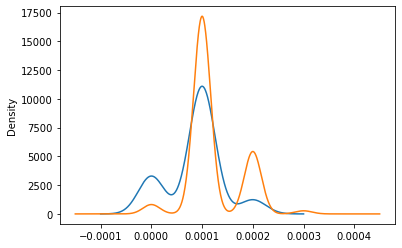

In [20]:
df[df.decision == "Yes"].distance.plot.kde()
df[df.decision == "No"].distance.plot.kde()

# Best Split Point

In [21]:
!pip install chefboost
from chefboost import Chefboost as chef

In [22]:
config = {'algorithm': 'C4.5'}

In [23]:
tmp_df = df[['distance', 'decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.8423101902008057  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.33333333333333 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[0, 0], [38, 262]]
Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %


# Sigma

In [24]:
sigma = 2
#2 sigma corresponds 95.45% confidence, and 3 sigma corresponds 99.73% confidence

threshold = round(tp_mean + sigma * tp_std, 4)
# threshold = 0.3147 #comes from c4.5 algorithm
print("threshold: ", threshold)

threshold:  0.0003


In [25]:
df[df.decision == 'Yes'].distance.max()

0.0002

In [26]:
df[df.decision == 'No'].distance.min()

0.0

# Evaluation

In [27]:
df["prediction"] = "No"

In [28]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [61]:
df.sample(5)

,file_x,file_y,decision,distance,prediction
297,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,No,0.0002,Yes
185,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,No,0.0000,Yes
176,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,No,0.0001,Yes
196,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,No,0.0000,Yes
143,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,D:/FYP_code/FYP_MODEL_CODE_API/tests/dataset/i...,No,0.0001,Yes


In [30]:
cm = confusion_matrix(df.decision.values, df.prediction.values)

In [31]:
cm

array([[  0, 262],
       [  0,  38]], dtype=int64)

In [32]:
tn, fp, fn, tp = cm.ravel()

In [33]:
tn, fp, fn, tp

(0, 262, 0, 38)

In [34]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [35]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  12.666666666666668 %
Recall:  100.0 %
F1 score  22.485207100591715 %
Accuracy:  12.666666666666668 %


In [36]:
df.to_csv("threshold_pivot.csv", index = False)

## Test results

### Threshold = 0.3147 (C4.5 best split point)

Precision:  100.0 %

Recall:  89.47368421052632 %

F1 score  94.44444444444444%

Accuracy:  98.66666666666667 %

### Threshold = 0.3751 (2 sigma)

Precision:  90.47619047619048 %

Recall:  100.0 %

F1 score  95.0 %

Accuracy:  98.66666666666667 %